In [31]:
import pandas as pd
import numpy as np
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (7.0, 10.0)

In [32]:
def parse_time(raw_time):
    '''Parse the raw time strings into timedeltas for doing arithmetic on the times'''
    if raw_time == '' or None:
        return None
    else:
        try:
            dt = datetime.datetime.strptime(str(raw_time), '%M:%S.%f')
            timedelta = datetime.timedelta(minutes=dt.minute, seconds=dt.second, microseconds=dt.microsecond)
            return timedelta
        except:
            dt = datetime.datetime.strptime(str(raw_time), '%S.%f')
            timedelta = datetime.timedelta(seconds=dt.second, microseconds=dt.microsecond)
            return timedelta


def timedeltaToString(rawTd):
    '''Convert timedelta to a MM:SS.000 formatted string'''
    try:
        dt = str(rawTd)[-12:-3]
        return dt
    except:
        return None

In [33]:
def processResults(df):
    '''Calculate split times, time gaps and rankings for each rider'''
    #Apply the time parser to the raw times
    for i in range(1,6):
        df['split' + str(i)] = df['split' + str(i)].apply(parse_time)

    #Calculate the total sector times for each split
    df['sector1'] = df['split1']
    df['sector2'] = df['split2'] - df['split1']
    df['sector3'] = df['split3'] - df['split2']
    df['sector4'] = df['split4'] - df['split3']
    df['sector5'] = df['split5'] - df['split4']

    #Calculate the time gaps and rankings for everything
    cols = ['sector1', 'sector2', 'sector3','sector4', 'sector5', 'split1', 'split2', 'split3','split4', 'split5']

    for col in cols:
        df[col + 'Gap'] = df[col].apply(lambda x: (x - df[col].min())/np.timedelta64(1,'s'))
        df[col + 'Rank'] = df[col].rank().astype(int)
        df[col] = df[col].apply(timedeltaToString)
        df[col + 'Rank']

    return df

In [34]:
df = pd.read_excel('2016_02_Cairns_Men.xlsx')
df.reset_index(inplace=True)
cols = ['Index',
        'Rank', 
        'P', 
        'Bib', 
        'UCI Code', 
        'Name', 
        'speed', 
        'split1', 
        'Pos 1 & 2', 
        'split3',
        'Pos 3 & 4',
        'split5',
        'Gap',
        'Pts']
df.columns = cols
df['split2'] = df['split1'].shift(-2)
df['split4'] = df['split3'].shift(-2)
df['Team'] = df['Name'].shift(-2)
df['split5'] = df['split5'].shift(-1)
df['speed'] = df['speed'].shift(-1)

df2 = df.iloc[::3, :][['Rank','Name','Team','split1', 'split2','split3','split4','split5']]
df2['split1'] = df2['split1'].apply(parse_time)
df2.dtypes

Rank              float64
Name               object
Team               object
split1    timedelta64[ns]
split2             object
split3             object
split4             object
split5             object
dtype: object

In [35]:
df = pd.read_excel('2016_02_Cairns_Men.xlsx')
df.reset_index(inplace=True)
cols = ['Index',
        'Rank', 
        'P', 
        'Bib', 
        'UCI Code', 
        'Name', 
        'speed', 
        'split1', 
        'Pos 1 & 2', 
        'split3',
        'Pos 3 & 4',
        'split5',
        'Gap',
        'Pts']
df.columns = cols
df['split2'] = df['split1'].shift(-2)
df['split4'] = df['split3'].shift(-2)
df['Team'] = df['Name'].shift(-2)
df['split5'] = df['split5'].shift(-1)
df['speed'] = df['speed'].shift(-1)
df.head(10)

df2 = df.iloc[::3, :][['Rank','Name','Team','split1', 'split2','split3','split4','split5']]
processResults(df2)
df2.to_csv('Cairns_Men.csv')
df2.head()

,Rank,Name,Team,split1,split2,split3,split4,split5,sector1,sector2,...,split1Gap,split1Rank,split2Gap,split2Rank,split3Gap,split3Rank,split4Gap,split4Rank,split5Gap,split5Rank
0,1.0,BRUNI Loic,SPECIALIZED GRAVITY POWERED BY SRAM,00:55.987,02:17.048,02:40.520,03:07.458,03:23.696,00:55.987,01:21.061,...,0.032,2,0.000,1,0.020,2,0.184,2,0.000,1
3,2.0,BROSNAN Troy,SPECIALIZED RACING,00:55.955,02:17.714,02:40.500,03:07.274,03:24.189,00:55.955,01:21.759,...,0.000,1,0.666,2,0.000,1,0.000,1,0.493,2
6,3.0,HANNAH Michael,POLYGON UR,00:57.168,02:18.914,02:41.811,03:08.602,03:24.620,00:57.168,01:21.746,...,1.213,4,1.866,3,1.311,3,1.328,3,0.924,3
9,4.0,GWIN Aaron,THE YT MOB,00:58.027,02:19.357,02:42.099,03:09.083,03:26.648,00:58.027,01:21.330,...,2.072,13,2.309,5,1.599,4,1.809,4,2.952,4
12,5.0,BUTTON Joshua,NaN,00:57.684,02:21.363,02:44.070,03:10.735,03:27.480,00:57.684,01:23.679,...,1.729,8,4.315,12,3.570,9,3.461,7,3.784,5


In [36]:
df_heatmap = df2[df2['split5Rank'] <= 20][['Name', 'split5Rank','sector1Rank', 'sector2Rank', 'sector3Rank', 'sector4Rank', 'sector5Rank']].sort_values('split5Rank')
cols = ['Name', 'Final', 'Sector 1', 'Sector 2', 'Sector 3', 'Sector 4', 'Sector 5']
df_heatmap.columns = cols
df_heatmap = df_heatmap[['Name', 'Sector 1', 'Sector 2', 'Sector 3', 'Sector 4', 'Sector 5']]
df_heatmap = df_heatmap.set_index('Name')
df_heatmap.head()

,Sector 1,Sector 2,Sector 3,Sector 4,Sector 5
Name,,,,,
BRUNI Loic,2,1,17,9,7
BROSNAN Troy,1,4,3,3,20
HANNAH Michael,4,3,5,5,2
GWIN Aaron,13,2,2,11,41
BUTTON Joshua,8,21,1,1,14


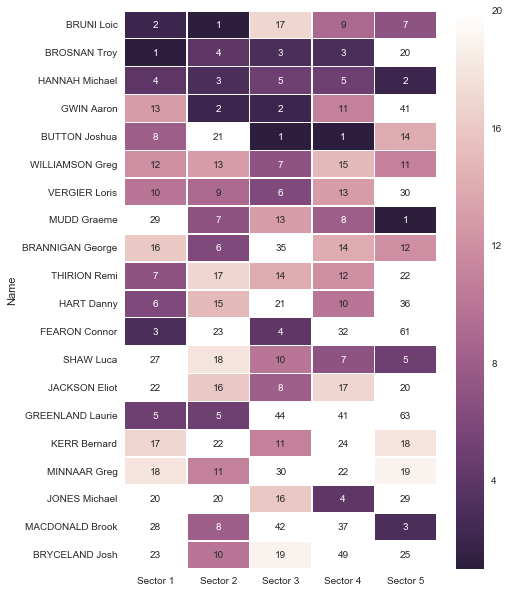

In [83]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d", linewidths=.5, vmin=1, vmax=20, cmap=cmap)
heatmap.figure.savefig('cairns_heatmap.png', bbox_inches='tight')

In [24]:
df_splittimes = df2[df2['split5Rank'] <= 20][['Name', 'split1Rank','split2Rank', 'split3Rank', 'split4Rank', 'split5Rank']]
df_splittimes = df_splittimes.set_index('Name')
df_splittimes = df_splittimes.T
df_splittimes

Name,BRUNI Loic,BROSNAN Troy,HANNAH Michael,GWIN Aaron,BUTTON Joshua,WILLIAMSON Greg,VERGIER Loris,MUDD Graeme,BRANNIGAN George,THIRION Remi,HART Danny,FEARON Connor,SHAW Luca,JACKSON Eliot,GREENLAND Laurie,KERR Bernard,MINNAAR Greg,JONES Michael,MACDONALD Brook,BRYCELAND Josh
split1Rank,2,1,4,13,8,12,10,29,16,7,6,3,27,22,5,17,18,20,28,23
split2Rank,1,2,3,5,12,11,8,16,7,10,9,6,22,19,4,20,13,21,17,14
split3Rank,2,1,3,4,9,8,6,14,12,11,10,5,20,13,7,16,17,19,22,15
split4Rank,2,1,3,4,7,8,5,14,12,11,10,6,16,13,9,17,18,15,22,21
split5Rank,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20


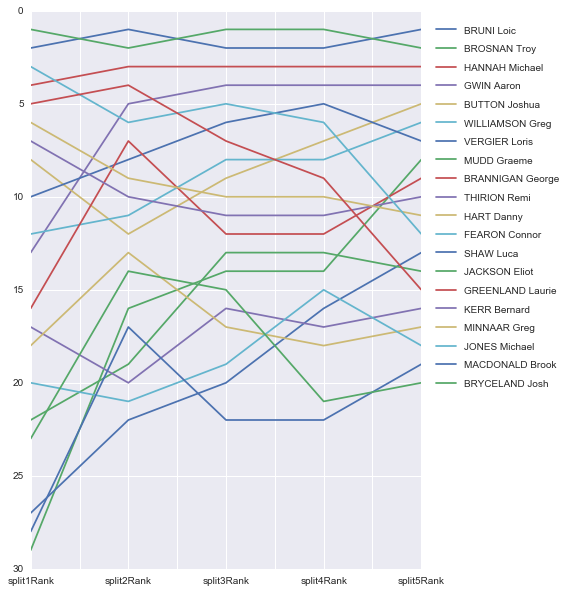

In [80]:
sns.set_style("darkgrid")
df_splittimes.plot()
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1, 1), labelspacing=0.96, borderpad=1.5, loc=2, borderaxespad=0.)
plt.savefig('cairns_positiontracker.png', bbox_inches='tight')

In [26]:
df2[['sector1','sector2','sector3','sector4','sector5', 'split5']][:1].T


,0
sector1,00:55.987
sector2,01:21.061
sector3,00:23.472
sector4,00:26.938
sector5,00:16.238
split5,03:23.696


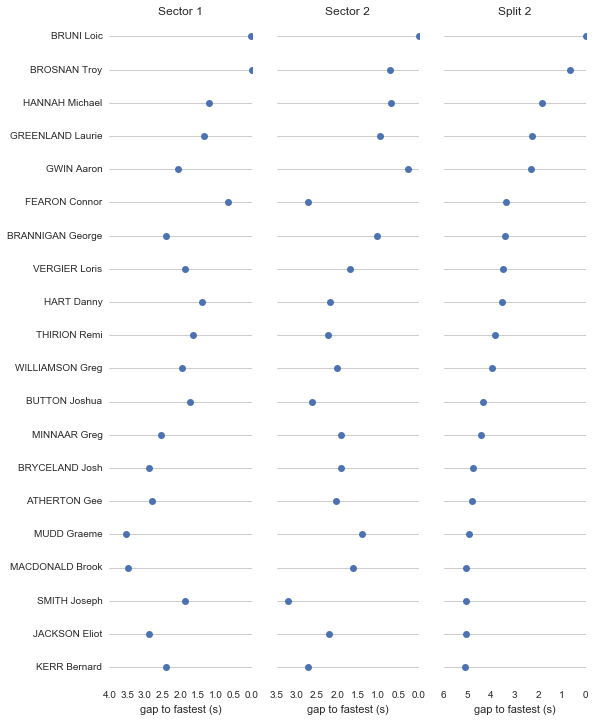

In [42]:
df_split1to3 = df2[['Name','sector1Gap','sector2Gap','split2Gap']].sort_values("split2Gap", ascending=True)
df_split1to3 = df_split1to3[:20]

sns.set_style("whitegrid")
g = sns.PairGrid(df_split1to3.sort_values("split2Gap", ascending=True),
                 x_vars=df_split1to3.columns[1:6], y_vars=["Name"],
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=7, orient="h", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0), xlabel="gap to fastest (s)", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Sector 1", "Sector 2", "Split 2"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    ax.invert_xaxis()

sns.despine(left=True, bottom=True)

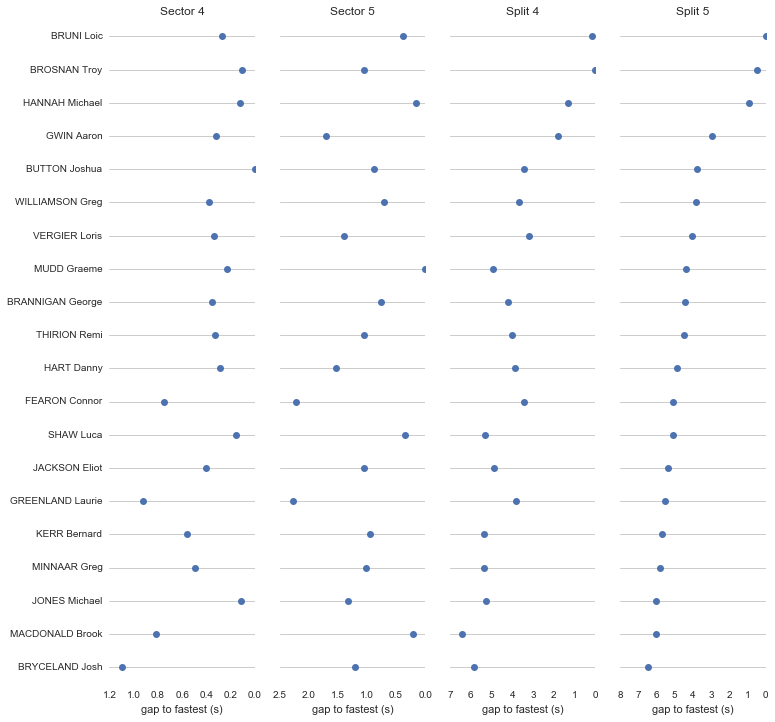

In [28]:
df_split4to5 = df2[['Name','sector4Gap','sector5Gap','split4Gap','split5Gap']].sort_values("split5Gap", ascending=True)
df_split4to5 = df_split4to5[:20]

sns.set_style("whitegrid")
g = sns.PairGrid(df_split4to5.sort_values("split5Gap", ascending=True),
                 x_vars=df_split4to5.columns[1:5], y_vars=["Name"],
                 size=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=7, orient="h",
    edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0), xlabel="gap to fastest (s)", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Sector 4", "Sector 5",
          "Split 4", "Split 5"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    ax.invert_xaxis()

sns.despine(left=True, bottom=True)

In [77]:
df_splits = df2[['Name','split1Gap','split2Gap','split3Gap','split4Gap','split5Gap']].sort_values("split5Gap", ascending=True)
df_splits[:20]

,Name,split1Gap,split2Gap,split3Gap,split4Gap,split5Gap
0,BRUNI Loic,0.032,0.000,0.020,0.184,0.000
3,BROSNAN Troy,0.000,0.666,0.000,0.000,0.493
6,HANNAH Michael,1.213,1.866,1.311,1.328,0.924
9,GWIN Aaron,2.072,2.309,1.599,1.809,2.952
12,BUTTON Joshua,1.729,4.315,3.570,3.461,3.784
15,WILLIAMSON Greg,1.969,3.943,3.416,3.685,3.840
18,VERGIER Loris,1.864,3.513,2.974,3.204,4.041
21,MUDD Graeme,3.541,4.913,4.818,4.938,4.377
24,BRANNIGAN George,2.412,3.399,3.985,4.233,4.423
27,THIRION Remi,1.647,3.850,3.784,4.008,4.502


In [78]:
df_splits = df2[['Name','sector1Gap','sector2Gap','sector3Gap','sector4Gap','sector5Gap']].sort_values("sector5Gap", ascending=True)
df_splits[:21]

,Name,sector1Gap,sector2Gap,sector3Gap,sector4Gap,sector5Gap
21,MUDD Graeme,3.541,1.404,0.650,0.229,0.000
6,HANNAH Michael,1.213,0.685,0.190,0.126,0.157
54,MACDONALD Brook,3.472,1.614,1.404,0.813,0.206
168,VARLEY Aiden,6.665,6.151,2.774,1.695,0.252
36,SHAW Luca,3.413,2.258,0.372,0.157,0.354
126,CONNELL Joseph,4.035,6.384,2.029,1.497,0.355
0,BRUNI Loic,0.032,0.000,0.765,0.273,0.377
87,GUTIERREZ VILLEGAS Marcelo,4.211,3.943,1.329,0.597,0.610
69,FISCHBACH Johannes,1.861,5.238,1.351,0.410,0.640
129,RIESCO Forrest,4.374,6.756,1.766,0.794,0.712


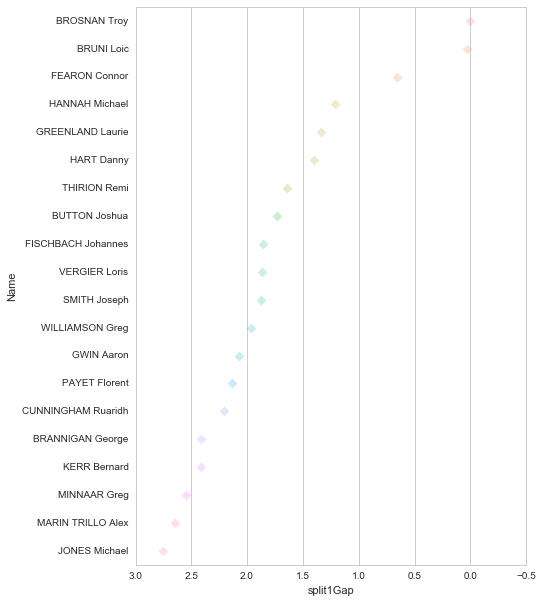

In [62]:
ax =  sns.stripplot("split1Gap","Name", data=df2[['Name','split1Gap']].sort_values("split1Gap", ascending=True)[:20],
                    size=7, marker="D",edgecolor="gray", alpha=.25)

# Make the grid horizontal instead of vertical
ax.invert_xaxis()

In [96]:
groups = ['split1', 'split2', 'split3','split4','split5','sector1', 'sector2', 'sector3','sector4','sector5']

for group in groups:
    segment = df2[['Name', group + 'Rank', group, group + 'Gap']].sort_values(group + 'Rank', ascending=True)[:20]
    cols = ['Name', 'Position', 'Time', 'Gap']
    segment.columns = cols
    segment.to_json(group + '.json', orient='records')